                                        pandas LIBRARY FOR READING CSV 

In [1]:
import pandas as pd

In [28]:
car=pd.read_csv('CAR_DETAILS_FROM_CAR_DEKHO.csv')


In [29]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


                    LabelEncoders for converting categorical data to numeric, or vice-versa

In [30]:
from sklearn.preprocessing import LabelEncoder


In [31]:
le = LabelEncoder()

In [32]:
car.name = le.fit_transform(car.name)
car.fuel = le.fit_transform(car.fuel)
car.seller_type = le.fit_transform(car.seller_type)
car.transmission = le.fit_transform(car.transmission)
car.owner = le.fit_transform(car.owner)

In [33]:
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,2007,60000,70000,4,1,1,0
1,1041,2007,135000,50000,4,1,1,0
2,505,2012,600000,100000,1,1,1,0
3,118,2017,250000,46000,4,1,1,0
4,279,2014,450000,141000,1,1,1,2


In [34]:
car.describe()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340.000000,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,751.591244,2013.090783,5.041273e+05,66215.777419,2.469124,0.794470,0.896774,0.820276
std,400.046963,4.215344,5.785487e+05,46644.102194,1.508435,0.458629,0.304289,1.233494
min,0.000000,1992.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.000000
25%,432.000000,2011.000000,2.087498e+05,35000.000000,1.000000,1.000000,1.000000,0.000000
50%,793.000000,2014.000000,3.500000e+05,60000.000000,1.000000,1.000000,1.000000,0.000000
75%,1048.000000,2016.000000,6.000000e+05,90000.000000,4.000000,1.000000,1.000000,2.000000
max,1490.000000,2020.000000,8.900000e+06,806599.000000,4.000000,2.000000,1.000000,4.000000


In [35]:
car.name = car.name.astype('category')

                                matplotlib.pyplot AND seaborn FOR DATA VISUALISATION

In [36]:
from matplotlib import pyplot as plt

In [37]:
import seaborn as sns

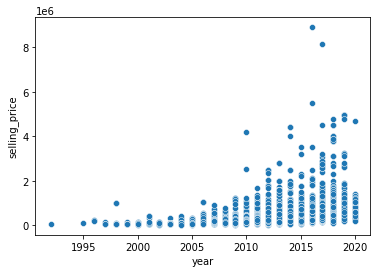

In [62]:
sns.scatterplot(x='year', y='selling_price', data=car)
plt.show()

                                    SPLITTING DATASET INTO test AND train DATA

In [93]:
y1=car['selling_price']
x1=car[['year','km_driven','fuel','seller_type','transmission','owner']]

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3)

In [96]:
x_train.head()

,year,km_driven,fuel,seller_type,transmission,owner
2371,2017,90000,1,1,1,0
394,2006,220000,4,1,1,2
1225,2012,80000,1,1,1,4
1369,2010,115000,4,1,1,2
3263,2004,80000,4,1,1,0


In [97]:
x_test.head()

,year,km_driven,fuel,seller_type,transmission,owner
3033,2008,70000,4,1,1,4
1380,2005,60000,4,1,1,2
227,2017,20000,1,1,1,0
3504,2010,100000,1,1,1,4
3377,2016,72500,4,0,1,0


In [98]:
y_train.head()

2371    600000
394     220000
1225    175000
1369    350000
3263     79000
Name: selling_price, dtype: int64

In [99]:
y_test.head()

3033     110000
1380      70000
227     1500000
3504     130000
3377     330000
Name: selling_price, dtype: int64

                                 sklearn.linear_model FOR LINEAR REGRESSION

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
lr = LinearRegression()

In [102]:
lr.fit(x_train, y_train)

LinearRegression()

In [103]:
y_pred = lr.predict(x_test)

In [104]:
y_pred[0:5]

array([ 13043.67922099, -50757.06989795, 739920.7131889 , 327146.65958548,
       421858.51016274])

                                            sklearn.metrics FOR MSE

In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
mean_squared_error(y_pred, y_test)

174481860155.41364

In [107]:
lr.intercept_

-73229440.35108043

In [108]:
lr.coef_

array([ 3.71637099e+04, -9.54122059e-01, -8.94664075e+04, -3.75921373e+04,
       -8.43700758e+05, -1.90745800e+04])